# Dataset

This dataset is a synthetic healthcare collection, designed to simulate real-world medical data. It provides an excellent opportunity for data analysts, machine learning practitioners, and data scientists to explore and practice data cleaning, analysis, and visualization techniques in a healthcare context.

### Column Descriptions:


Name: Represents the full name of the patient associated with each medical record.

Age: The age of the patient at the time of their admission to the healthcare facility, measured in years.

Gender: The gender of the patient, recorded as either "Male" or "Female."

Blood Type: The patient’s blood type, recorded using standard classifications like "A+", "O-", etc.

Medical Condition: The primary health condition diagnosed at the time of admission, such as "Diabetes," "Hypertension," or "Asthma."

Date of Admission: The date the patient was admitted to the hospital or healthcare facility.

Doctor: The name of the physician assigned to the patient's care during their hospital stay.

Hospital: The healthcare facility where the patient received treatment.

Insurance Provider: The healthcare insurance company covering the patient’s treatment, such as "Aetna," "Cigna," or "UnitedHealthcare."

Billing Amount: The total cost for the patient’s healthcare services, recorded as a floating-point number.

Room Number: The hospital room where the patient was assigned during their stay.

Admission Type: The categorization of the admission based on urgency, which may be "Emergency," "Elective," or "Urgent."

Discharge Date: The date the patient was discharged from the healthcare facility, which is determined by the admission date and a realistic range of days.

Medication: Lists the drugs or treatments prescribed to the patient during their hospitalization. Examples include "Aspirin," "Lipitor," or "Paracetamol."

Test Results: The outcome of any medical tests conducted, recorded as "Normal," "Abnormal," or "Inconclusive."



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### **1.1 Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### **1.2 Loading the dataset**

In [3]:
data = pd.read_csv("C:/Users/prana/OneDrive/Documents/Data Analytics Projects/Healthcare-Data-Analytics/healthcare_dataset.csv")

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [4]:
# Checking Shape of data
data.shape

(10000, 15)

In [5]:
# Columns in data
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
# Info About columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

# Data Cleaning

### **1.4 Null and Duplicate Values**

In [7]:
# Checking Null Values
data.isnull().sum() / len(data) * 100

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


There are no null values in the dataset

### Checking for duplicates

In [60]:
#Removing Duplicate rows and missing values
duplicate_rows = data[data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


### Datatype Conversions

In [13]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [14]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])



'Date of Admission' and 'Discharge Date' were listed as objects which are actually datetime. 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

### Unique Values

In [16]:
data.nunique()

Name                   9378
Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1815
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Room Number             400
Admission Type            3
Discharge Date         1834
Medication                5
Test Results              3
dtype: int64

In [17]:
data['Gender'].value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64



Gender has two categories 

* Male -> 27774
* Female -> 27776

In [18]:
data['Blood Type'].value_counts()

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64



Blood Type has below Categories:

* A-    ->  6969
* A+    ->  6956
* AB+   ->  6947
* AB-   ->  6945
* B+    ->  6945
* B-    ->  6944
* O+    ->  6917
* O-    ->  6877


In [19]:
data['Medical Condition'].value_counts()

Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


Medical Condition has below Categories:

* Arthritis   ->     9308
* Diabetes     ->    9304
* Hypertension ->    9245
* Obesity    ->     9231
* Cancer      ->     9227
* Asthma      ->     9185

In [20]:
data['Insurance Provider'].value_counts()

Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64




Insurance Provider has below categories:

* Cigna            ->    11249
* Medicare         ->    11154
* UnitedHealthcare ->    11125
* Blue Cross       ->    11059
* Aetna            ->    10913


In [21]:
data['Admission Type'].value_counts()

Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64



Admission Type has below Categories:

* Elective   ->   18655
* Urgent     ->   18576
* Emergency  ->   18269

In [22]:
data['Medication'].value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64



Medication has below categories:

* Lipitor     ->   11140
* Ibuprofen   ->   11127
* Aspirin     ->   11094
* Paracetamol->    11071
* Penicillin  ->   11068


In [23]:
data['Test Results'].value_counts()

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64



Test Results has below categories:

* Abnormal    ->     18627
* Normal      ->     18517
* Inconclusive ->    18356

### **1.7 Dropping Unwanted Columns**

In [24]:
df = data.drop(columns = ['Name','Doctor','Hospital', 'Room Number'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Insurance Provider  10000 non-null  object        
 6   Billing Amount      10000 non-null  float64       
 7   Admission Type      10000 non-null  object        
 8   Discharge Date      10000 non-null  datetime64[ns]
 9   Medication          10000 non-null  object        
 10  Test Results        10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 859.5+ KB



Dropping Name, Doctor,Hospital, Room Number columns

# Feature Engineering

####  Number of admitted days- 
Adding a new column

In [25]:
df['Days_Admitted'] = (df['Discharge Date'] - df['Date of Admission']).dt.days + 1


Creating new column called "Days_Admitted" with days spent by patient between Date of Admission and Discharge Date

In [26]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Days_Admitted
0,81,Female,O-,Diabetes,2022-11-17,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,15
1,35,Male,O+,Asthma,2023-06-01,UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,15
2,61,Male,B-,Obesity,2019-01-09,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,31
3,49,Male,B-,Asthma,2020-05-02,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,2
4,51,Male,O-,Arthritis,2021-07-09,UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,25


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Insurance Provider  10000 non-null  object        
 6   Billing Amount      10000 non-null  float64       
 7   Admission Type      10000 non-null  object        
 8   Discharge Date      10000 non-null  datetime64[ns]
 9   Medication          10000 non-null  object        
 10  Test Results        10000 non-null  object        
 11  Days_Admitted       10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 937.6+ KB


# Exploratory Data Analysis EDA

### **3.1 Statistical Summary**

In [28]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Age,10000.0,NaN,NaN,NaN,51.4522,18.0,35.0,52.0,68.0,85.0,19.588974
Gender,10000,2,Female,5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,NaN,NaN,NaN,2021-05-01 21:53:25.439999744,2018-10-30 00:00:00,2020-02-10 00:00:00,2021-05-02 00:00:00,2022-07-23 06:00:00,2023-10-30 00:00:00,NaN
Insurance Provider,10000,5,Cigna,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,25516.806778,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283,14067.292709
Admission Type,10000,3,Urgent,3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discharge Date,10000,NaN,NaN,NaN,2021-05-17 11:22:24.960000,2018-11-01 00:00:00,2020-02-23 18:00:00,2021-05-18 00:00:00,2022-08-07 00:00:00,2023-11-27 00:00:00,NaN
Medication,10000,5,Penicillin,2079,NaN,NaN,NaN,NaN,NaN,NaN,NaN




* Age: 

> Minimum Age: 13\
> Maximum Age: 89\
> Mean Age: 51.5\
> Median Age: 52\
> 25th Percentile: 35\
> 75th Percentile: 68
    
* Gender:

> There are 2 unique values - Male and Female\
> Male has highest frequency of 27774 records

* Blood Type:

> There are 8 unique values in Blood Type column\
> A- has higest frequency of 6969 records

* Medical Condition:

> There are 6 unique values in Medical Condition column\
> Arthritis has highest frequency of 9308 records

* Date of Admission:

> First Date of Admission in Dataset is 2019-05-08\
> Last Date of Admission in Dataset is 2024-05-07

* Insurance Provider:

> There are 5 unique values in Insurance Provider Column\
> Cigna has highest frequency of 11249 records

* Billing Amount:

> Minimum Billing Amount: -2008.49214	
> Maximum Billing Amount: 52764.276736\
> Mean Billing Amount: 25539.316097\
> Median Billing Amount: 25538.069376\
> 25th Percentile: 13241.224652 	\
> 75th Percentile: 37820.508436

* Admission Type:

> There are 3 unique values in Admission Type field
> Elective has highest frequency of	18655 records

* Discharge Date:

> First Discharge Date in Dataset is 2019-05-09\
> Last Discharge Date in Dataset is 2024-06-06

* Medication:

> There are 5 unique values in Medication field:
> Lipitor has highest frequeny of 11140 records

* Days_Admitted:

> Minimum Days Admitted : 2 days\
> Maximum Days Admitted: 31\
> Mean Days Admitted: 16.5\
> Median Days Admitted: 16\
> 25th Percentile: 9 \
> 75th Percentile: 24

* Test Results:

> There are 3 unique values in Test Results column\
> Abnormal has highest frequency of	18627 records


### Separate Numerical and Categorical Columns

In [29]:
cat_cols = df.select_dtypes(include = ['object']).columns
num_cols = df.select_dtypes(include = np.number).columns

In [30]:
cat_cols

Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

In [31]:
num_cols

Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object')

### **3.3 Univariate Analysis - Numeric Values**

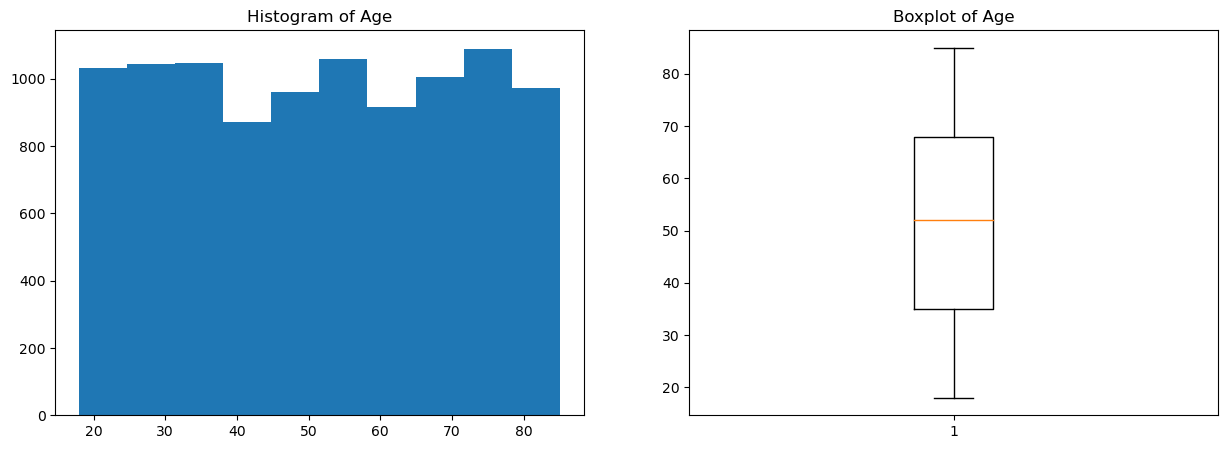

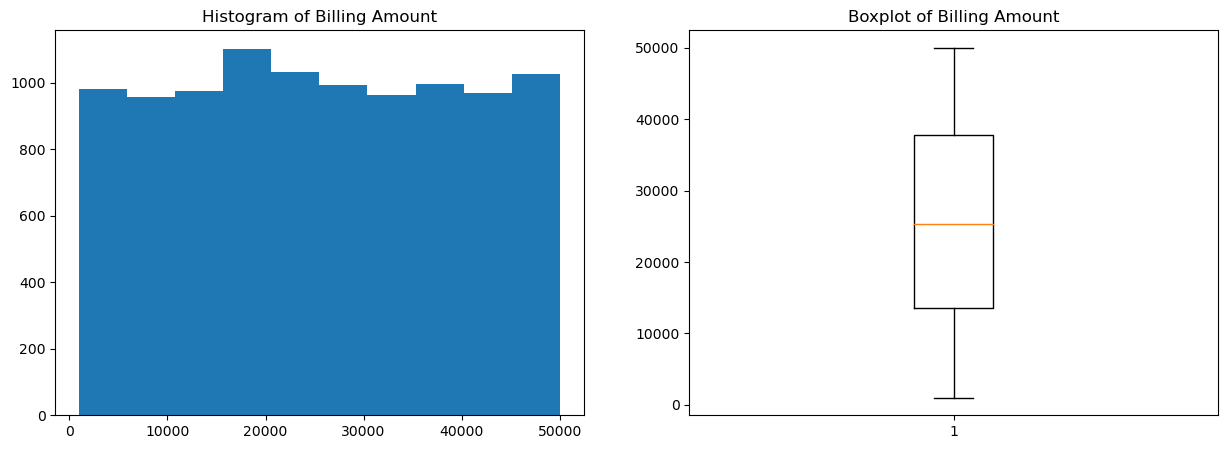

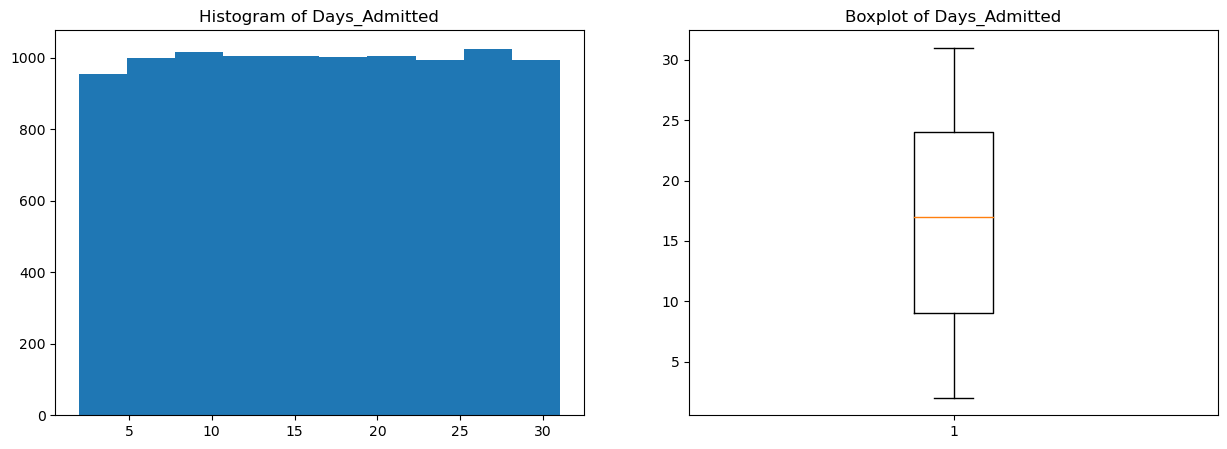

In [32]:
for col in num_cols:
    plt.figure(figsize= (15,5))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.title(f"Histogram of {col}")
    plt.subplot(1,2,2)
    plt.boxplot(x = df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()



Univariate Analysis on Numerical Columns found no outliers and also mean and median matches.\
Also, Age, Billing Amount and Days_Admitted distributions are equally distributed

### **3.4 Univariate Analysis - Categorical Variables**

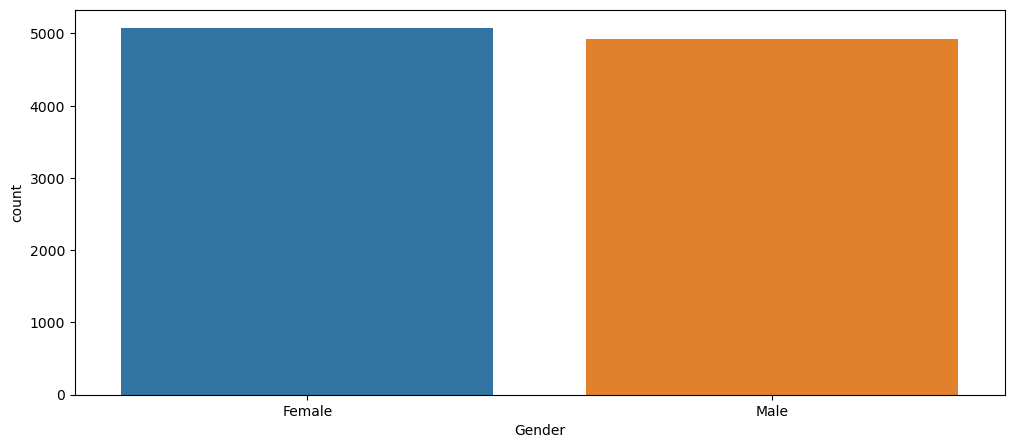

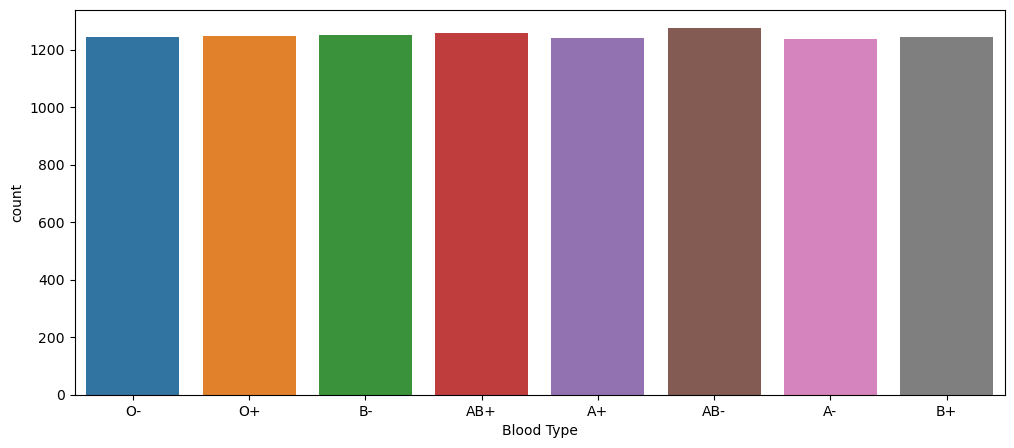

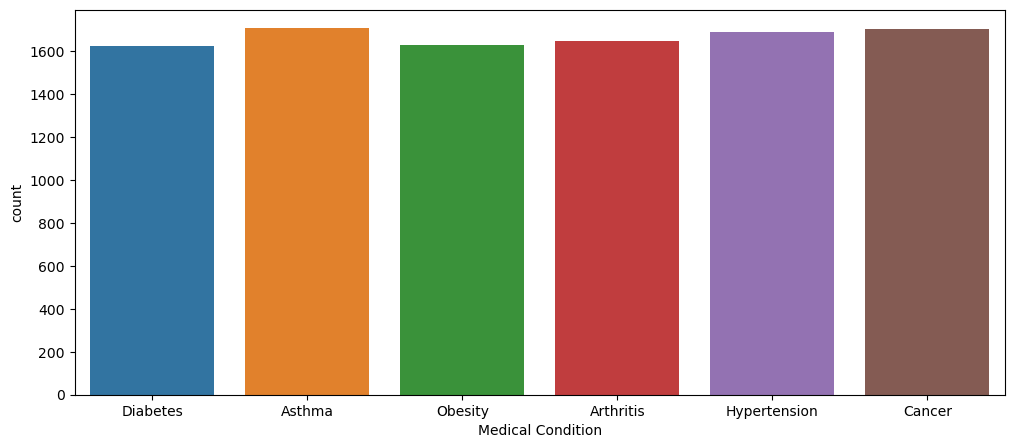

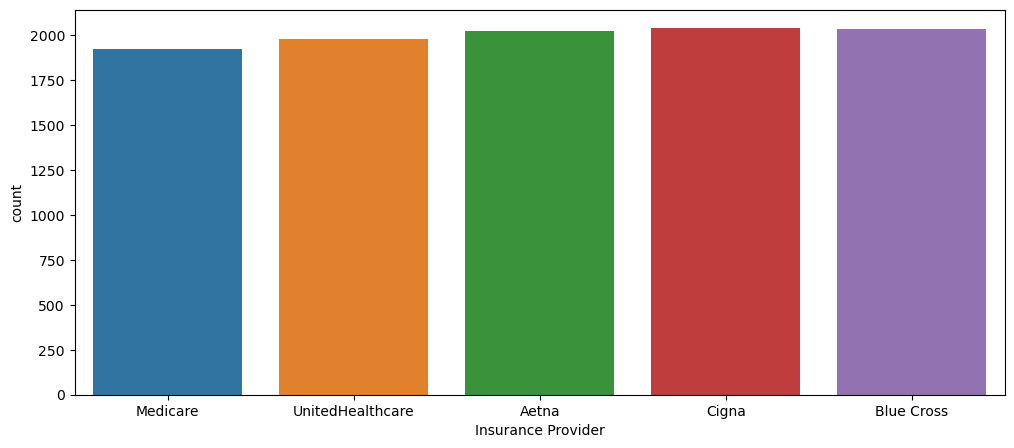

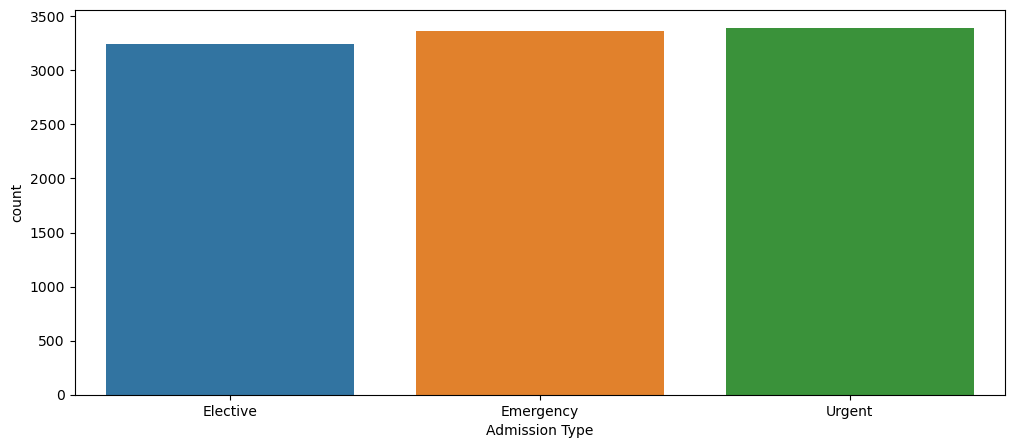

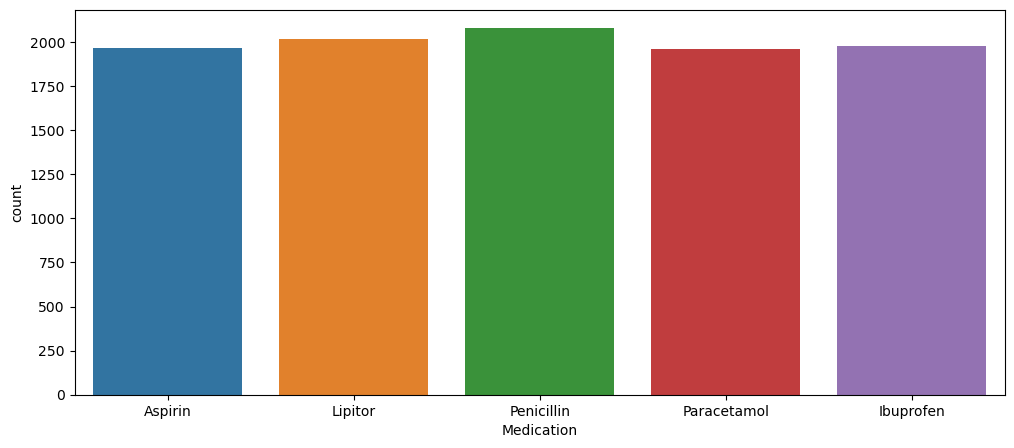

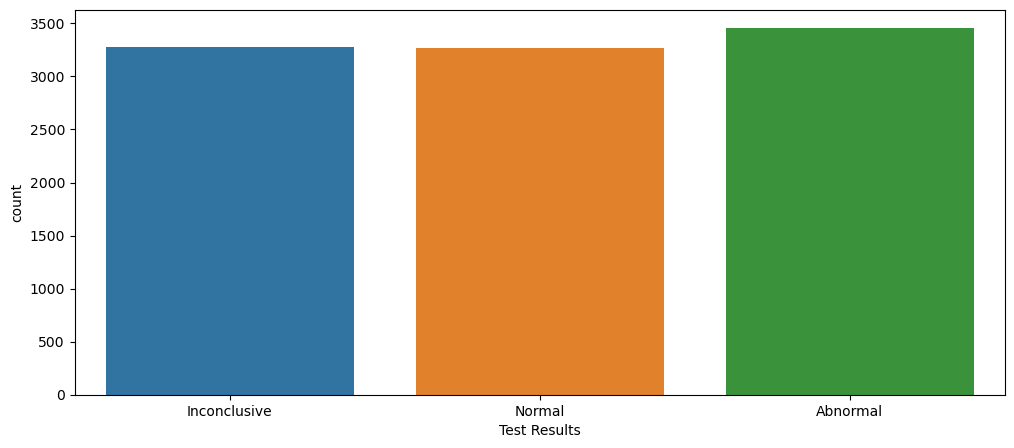

In [33]:
for col in cat_cols:
    plt.figure(figsize = (12, 5))
    plt.subplot(1,1,1)
    sns.countplot(data = df, x = col)



All distributions are equally distributed

### **3.5 Bivariate Analysis**

In [34]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

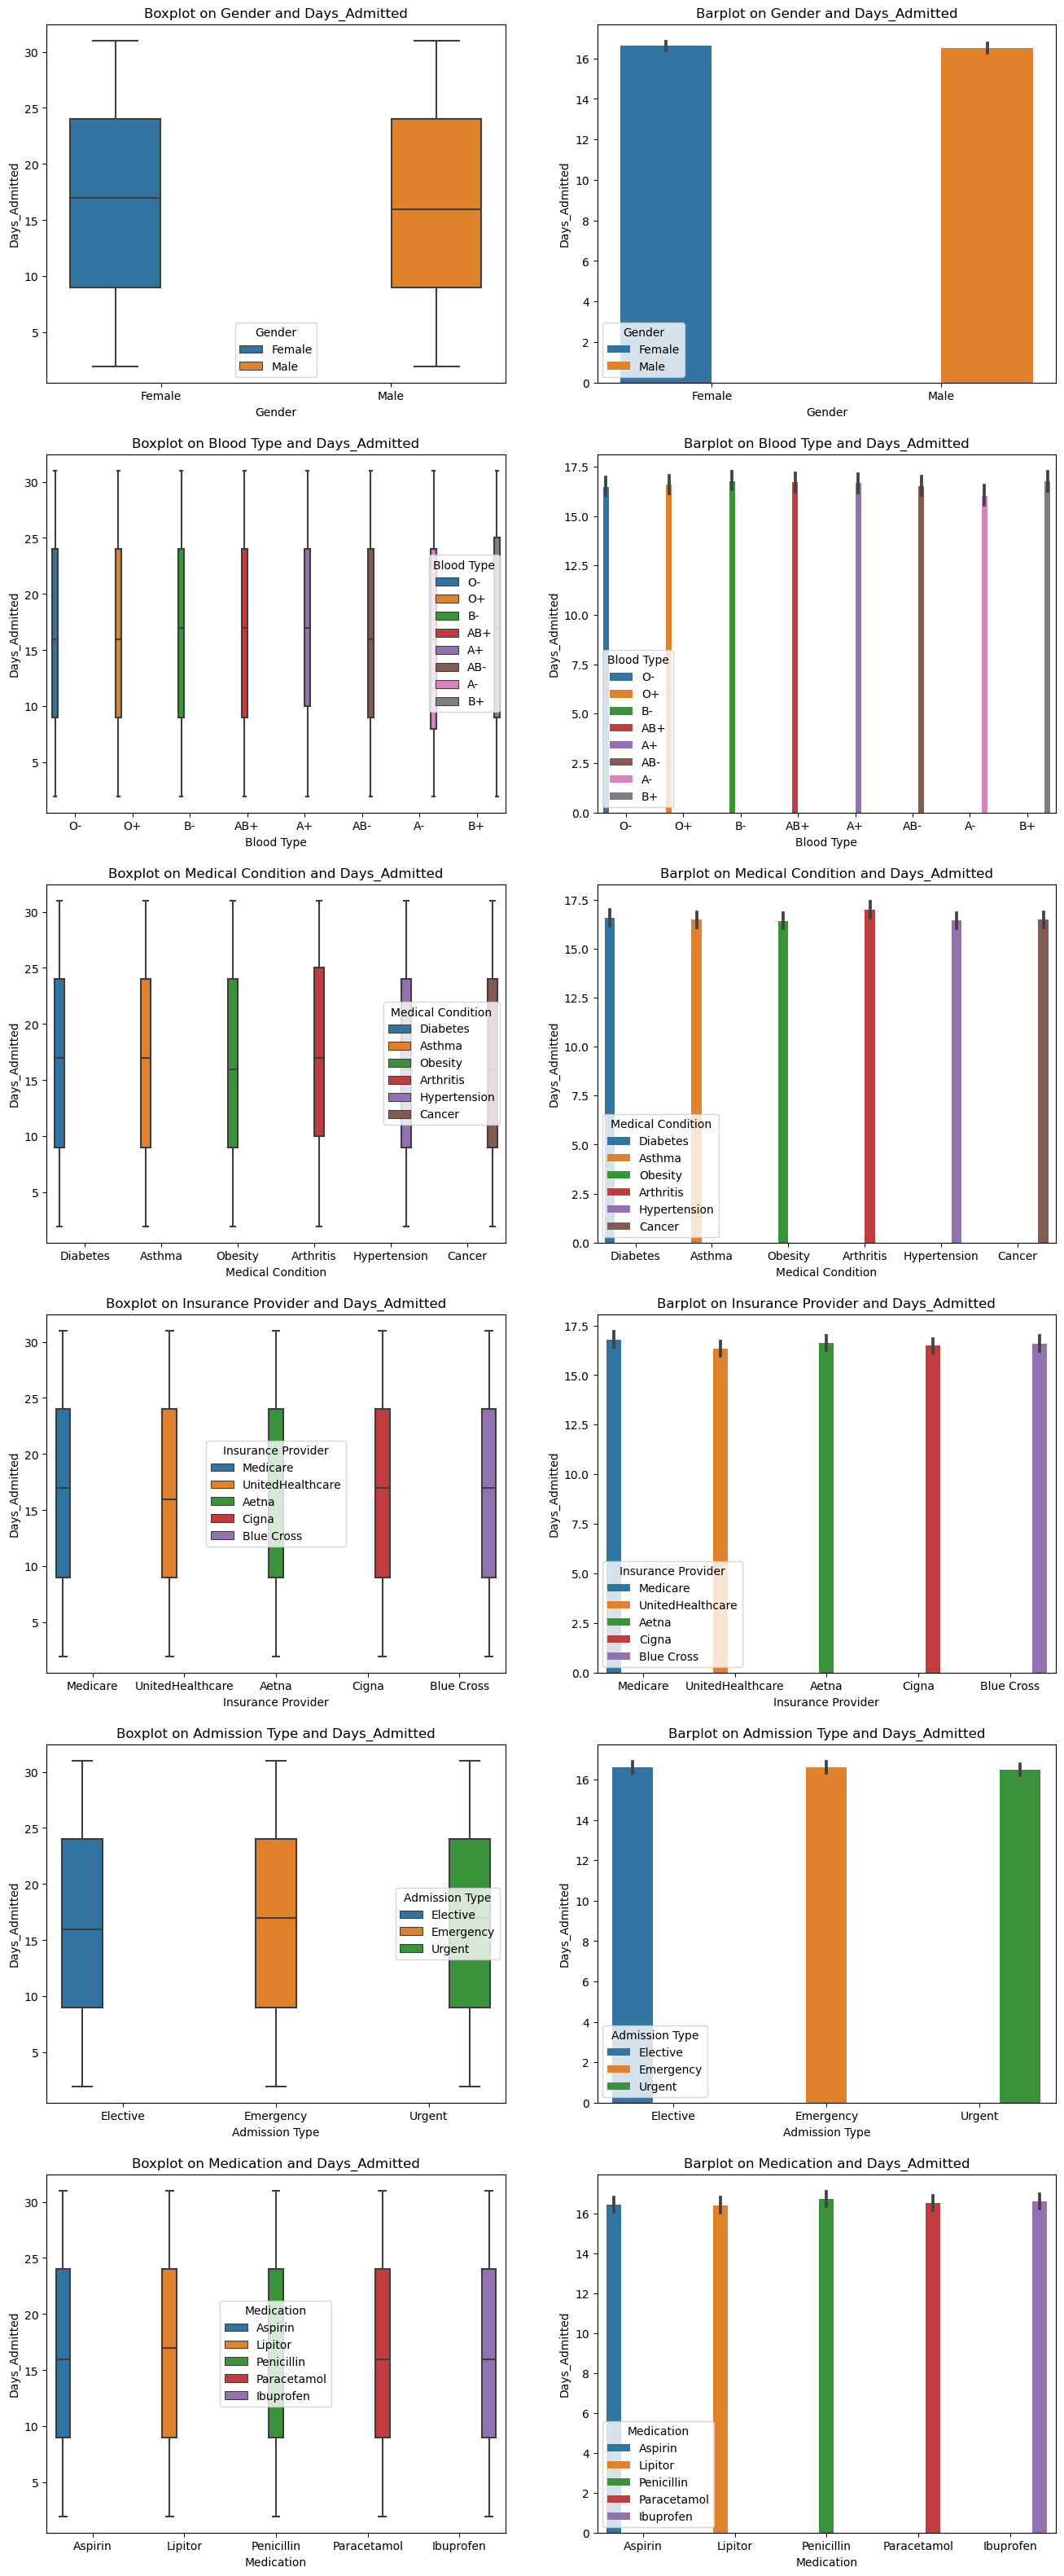

In [35]:
plt.figure(figsize = (16, 40))

plt.subplot(6,2,1)
sns.boxplot(data = df, x = 'Gender', y = 'Days_Admitted', hue = 'Gender')
plt.title("Boxplot on Gender and Days_Admitted")


plt.subplot(6,2,2)
sns.barplot(data = df, x = "Gender", y = "Days_Admitted", hue = "Gender")
plt.title("Barplot on Gender and Days_Admitted")

plt.subplot(6,2,3)
sns.boxplot(data = df, x = 'Blood Type', y = 'Days_Admitted', hue = 'Blood Type')
plt.title("Boxplot on Blood Type and Days_Admitted")


plt.subplot(6,2,4)
sns.barplot(data = df, x = "Blood Type", y = "Days_Admitted", hue = "Blood Type")
plt.title("Barplot on Blood Type and Days_Admitted")


plt.subplot(6,2,5)
sns.boxplot(data = df, x = 'Medical Condition', y = 'Days_Admitted', hue = 'Medical Condition')
plt.title("Boxplot on Medical Condition and Days_Admitted")


plt.subplot(6,2,6)
sns.barplot(data = df, x = "Medical Condition", y = "Days_Admitted", hue = "Medical Condition")
plt.title("Barplot on Medical Condition and Days_Admitted")

plt.subplot(6,2,7)
sns.boxplot(data = df, x = 'Insurance Provider', y = 'Days_Admitted', hue = 'Insurance Provider')
plt.title("Boxplot on Insurance Provider and Days_Admitted")


plt.subplot(6,2,8)
sns.barplot(data = df, x = "Insurance Provider", y = "Days_Admitted", hue = "Insurance Provider")
plt.title("Barplot on Insurance Provider and Days_Admitted")

plt.subplot(6,2,9)
sns.boxplot(data = df, x = 'Admission Type', y = 'Days_Admitted', hue = 'Admission Type')
plt.title("Boxplot on Admission Type and Days_Admitted")


plt.subplot(6,2,10)
sns.barplot(data = df, x = "Admission Type", y = "Days_Admitted", hue = "Admission Type")
plt.title("Barplot on Admission Type and Days_Admitted")

plt.subplot(6,2,11)
sns.boxplot(data = df, x = 'Medication', y = 'Days_Admitted', hue = 'Medication')
plt.title("Boxplot on Medication and Days_Admitted")


plt.subplot(6,2,12)
sns.barplot(data = df, x = "Medication", y = "Days_Admitted", hue = "Medication")
plt.title("Barplot on Medication and Days_Admitted")

plt.show()

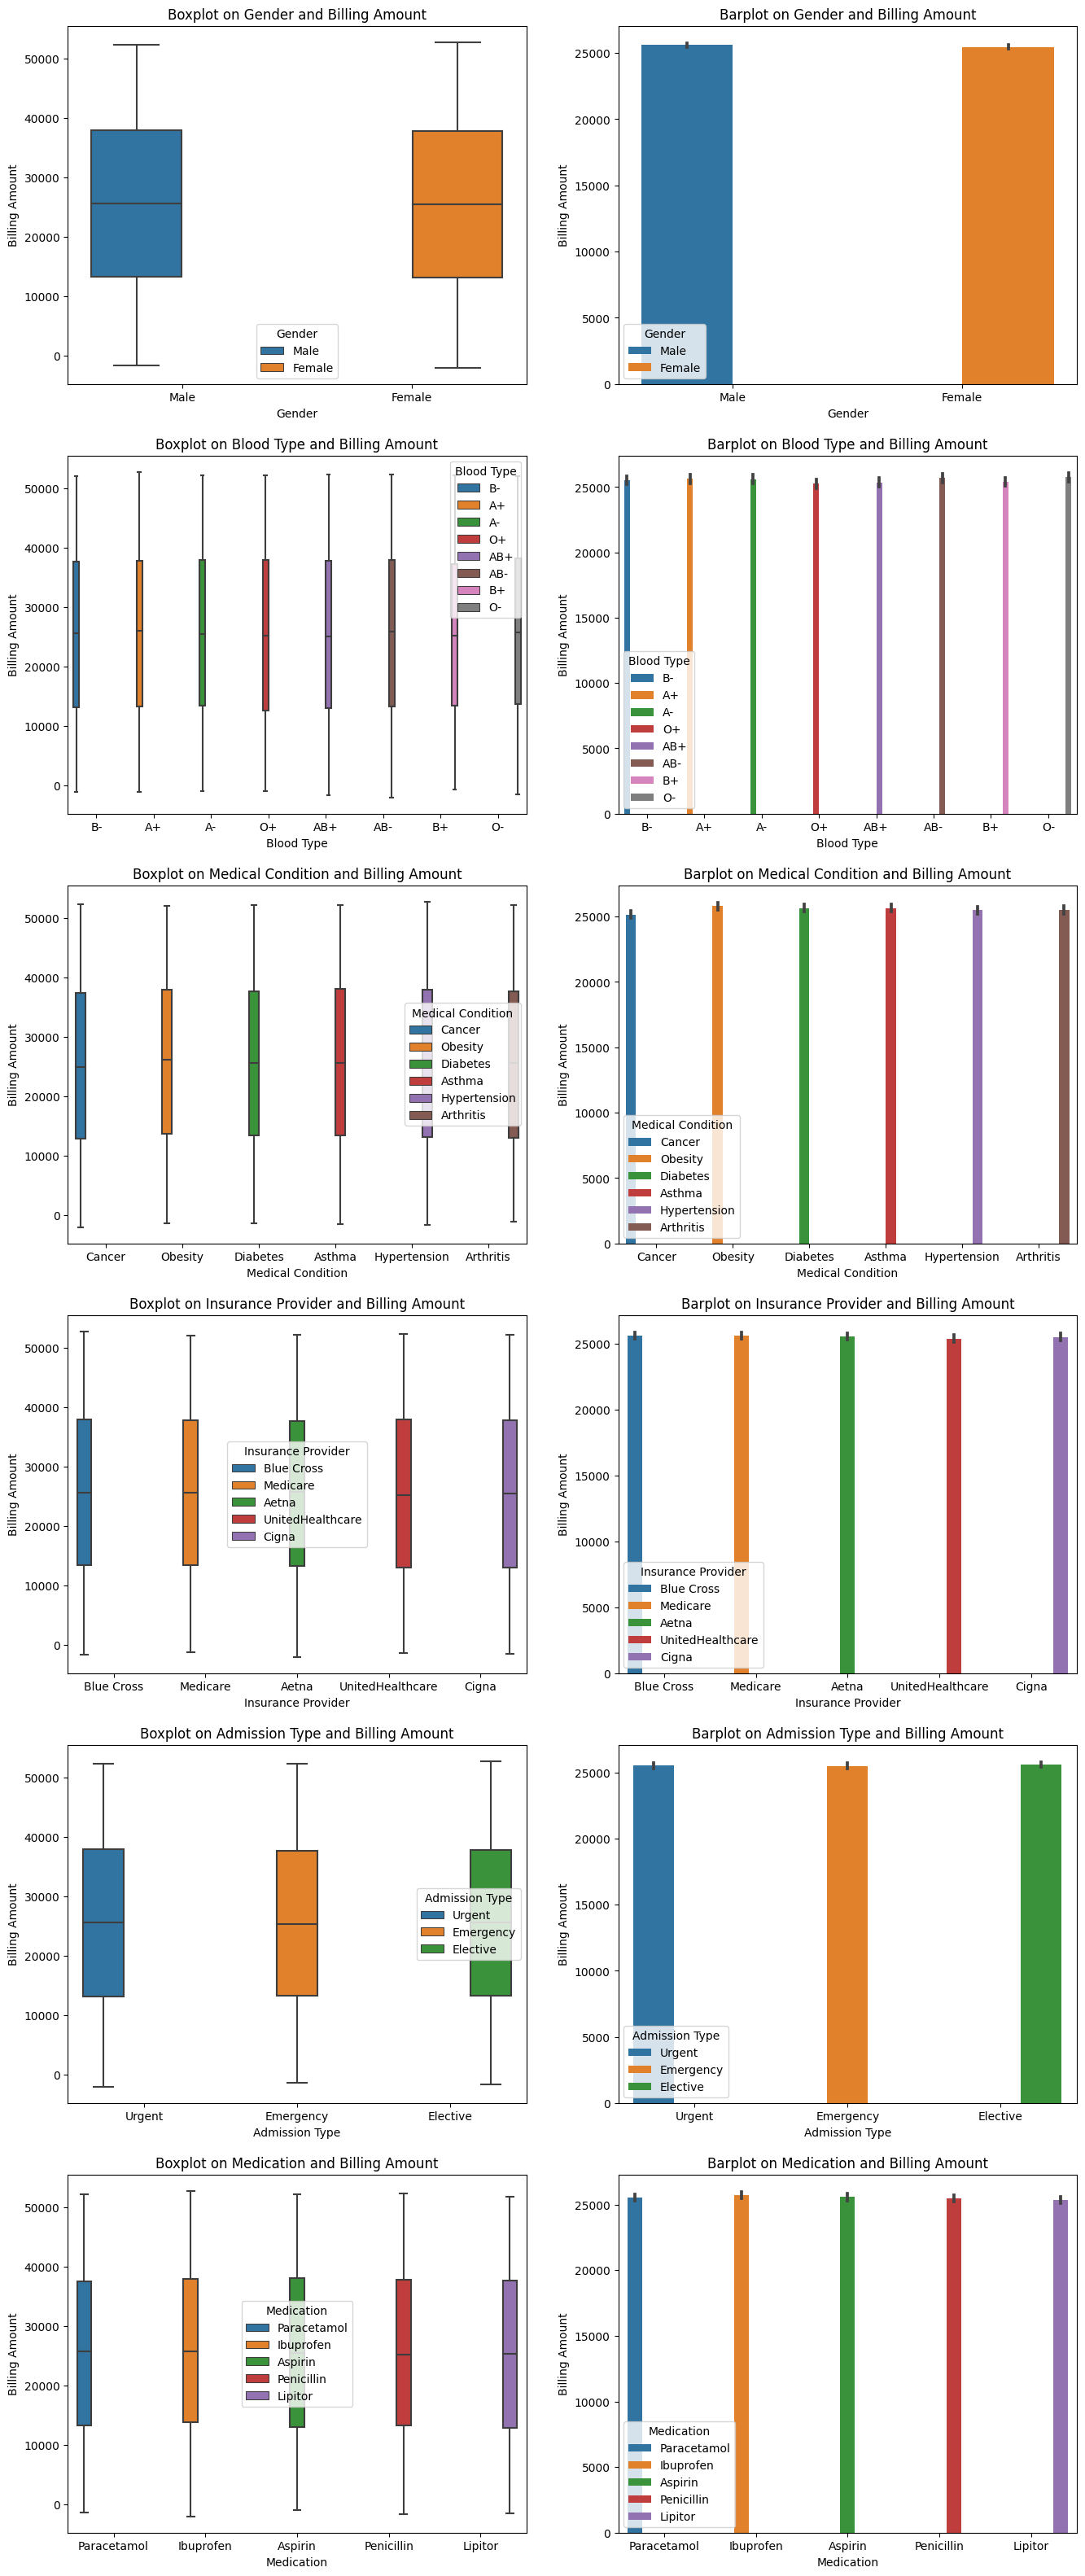

In [32]:
plt.figure(figsize = (16, 40))

plt.subplot(6,2,1)
sns.boxplot(data = df, x = 'Gender', y = 'Billing Amount', hue = 'Gender')
plt.title("Boxplot on Gender and Billing Amount")


plt.subplot(6,2,2)
sns.barplot(data = df, x = "Gender", y = "Billing Amount", hue = "Gender")
plt.title("Barplot on Gender and Billing Amount")

plt.subplot(6,2,3)
sns.boxplot(data = df, x = 'Blood Type', y = 'Billing Amount', hue = 'Blood Type')
plt.title("Boxplot on Blood Type and Billing Amount")


plt.subplot(6,2,4)
sns.barplot(data = df, x = "Blood Type", y = "Billing Amount", hue = "Blood Type")
plt.title("Barplot on Blood Type and Billing Amount")


plt.subplot(6,2,5)
sns.boxplot(data = df, x = 'Medical Condition', y = 'Billing Amount', hue = 'Medical Condition')
plt.title("Boxplot on Medical Condition and Billing Amount")


plt.subplot(6,2,6)
sns.barplot(data = df, x = "Medical Condition", y = "Billing Amount", hue = "Medical Condition")
plt.title("Barplot on Medical Condition and Billing Amount")

plt.subplot(6,2,7)
sns.boxplot(data = df, x = 'Insurance Provider', y = 'Billing Amount', hue = 'Insurance Provider')
plt.title("Boxplot on Insurance Provider and Billing Amount")


plt.subplot(6,2,8)
sns.barplot(data = df, x = "Insurance Provider", y = "Billing Amount", hue = "Insurance Provider")
plt.title("Barplot on Insurance Provider and Billing Amount")

plt.subplot(6,2,9)
sns.boxplot(data = df, x = 'Admission Type', y = 'Billing Amount', hue = 'Admission Type')
plt.title("Boxplot on Admission Type and Billing Amount")


plt.subplot(6,2,10)
sns.barplot(data = df, x = "Admission Type", y = "Billing Amount", hue = "Admission Type")
plt.title("Barplot on Admission Type and Billing Amount")

plt.subplot(6,2,11)
sns.boxplot(data = df, x = 'Medication', y = 'Billing Amount', hue = 'Medication')
plt.title("Boxplot on Medication and Billing Amount")


plt.subplot(6,2,12)
sns.barplot(data = df, x = "Medication", y = "Billing Amount", hue = "Medication")
plt.title("Barplot on Medication and Billing Amount")

plt.show()

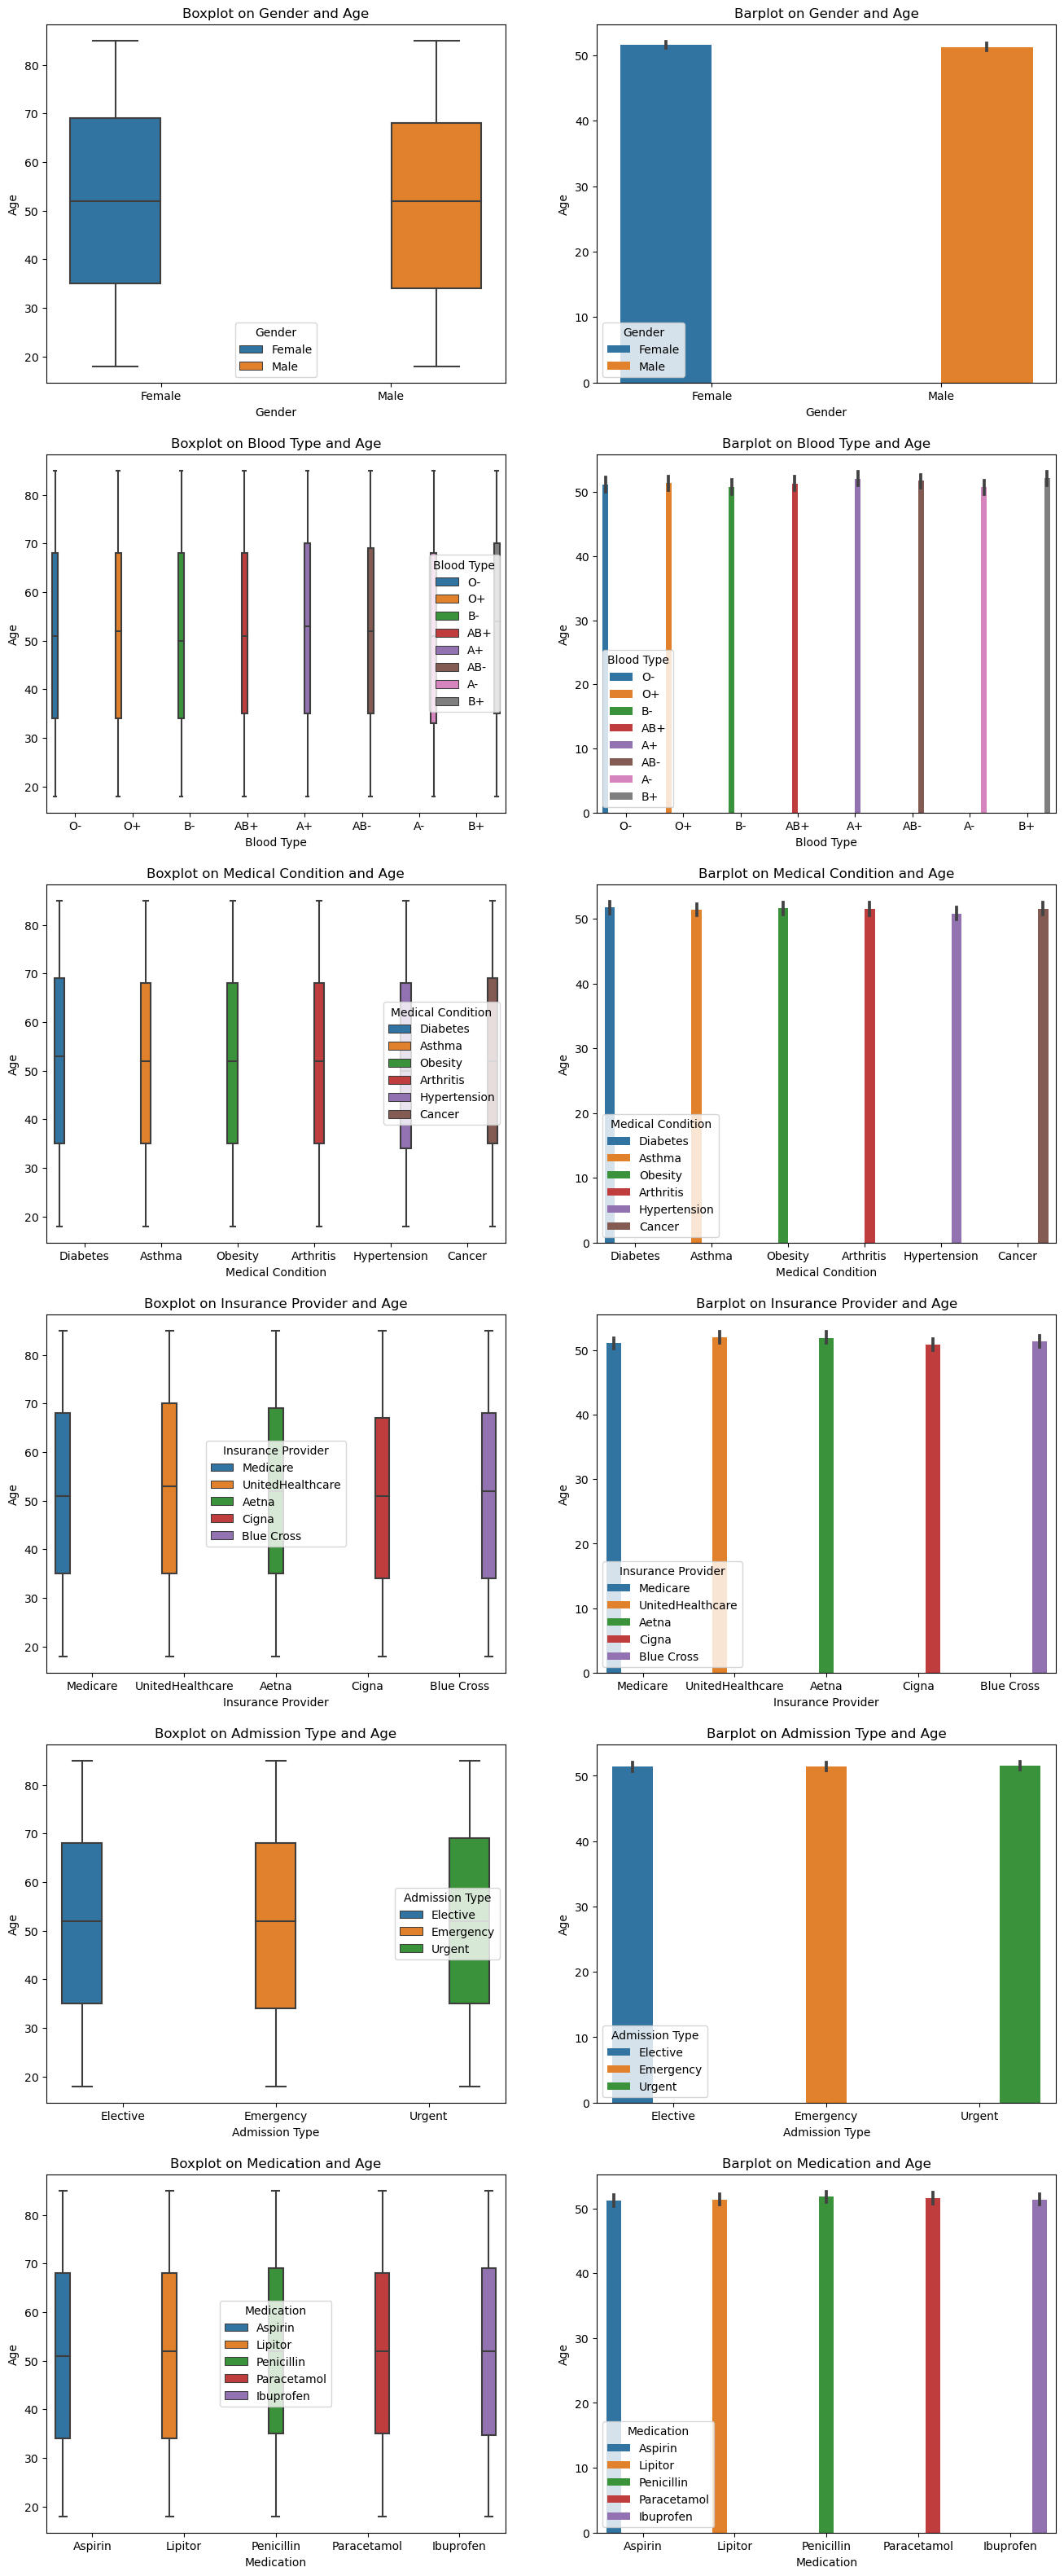

In [36]:
plt.figure(figsize = (16, 40))

plt.subplot(6,2,1)
sns.boxplot(data = df, x = 'Gender', y = 'Age', hue = 'Gender')
plt.title("Boxplot on Gender and Age")


plt.subplot(6,2,2)
sns.barplot(data = df, x = "Gender", y = "Age", hue = "Gender")
plt.title("Barplot on Gender and Age")

plt.subplot(6,2,3)
sns.boxplot(data = df, x = 'Blood Type', y = 'Age', hue = 'Blood Type')
plt.title("Boxplot on Blood Type and Age")


plt.subplot(6,2,4)
sns.barplot(data = df, x = "Blood Type", y = "Age", hue = "Blood Type")
plt.title("Barplot on Blood Type and Age")


plt.subplot(6,2,5)
sns.boxplot(data = df, x = 'Medical Condition', y = 'Age', hue = 'Medical Condition')
plt.title("Boxplot on Medical Condition and Age")


plt.subplot(6,2,6)
sns.barplot(data = df, x = "Medical Condition", y = "Age", hue = "Medical Condition")
plt.title("Barplot on Medical Condition and Age")

plt.subplot(6,2,7)
sns.boxplot(data = df, x = 'Insurance Provider', y = 'Age', hue = 'Insurance Provider')
plt.title("Boxplot on Insurance Provider and Age")


plt.subplot(6,2,8)
sns.barplot(data = df, x = "Insurance Provider", y = "Age", hue = "Insurance Provider")
plt.title("Barplot on Insurance Provider and Age")

plt.subplot(6,2,9)
sns.boxplot(data = df, x = 'Admission Type', y = 'Age', hue = 'Admission Type')
plt.title("Boxplot on Admission Type and Age")


plt.subplot(6,2,10)
sns.barplot(data = df, x = "Admission Type", y = "Age", hue = "Admission Type")
plt.title("Barplot on Admission Type and Age")

plt.subplot(6,2,11)
sns.boxplot(data = df, x = 'Medication', y = 'Age', hue = 'Medication')
plt.title("Boxplot on Medication and Age")


plt.subplot(6,2,12)
sns.barplot(data = df, x = "Medication", y = "Age", hue = "Medication")
plt.title("Barplot on Medication and Age")

plt.show()

In [37]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

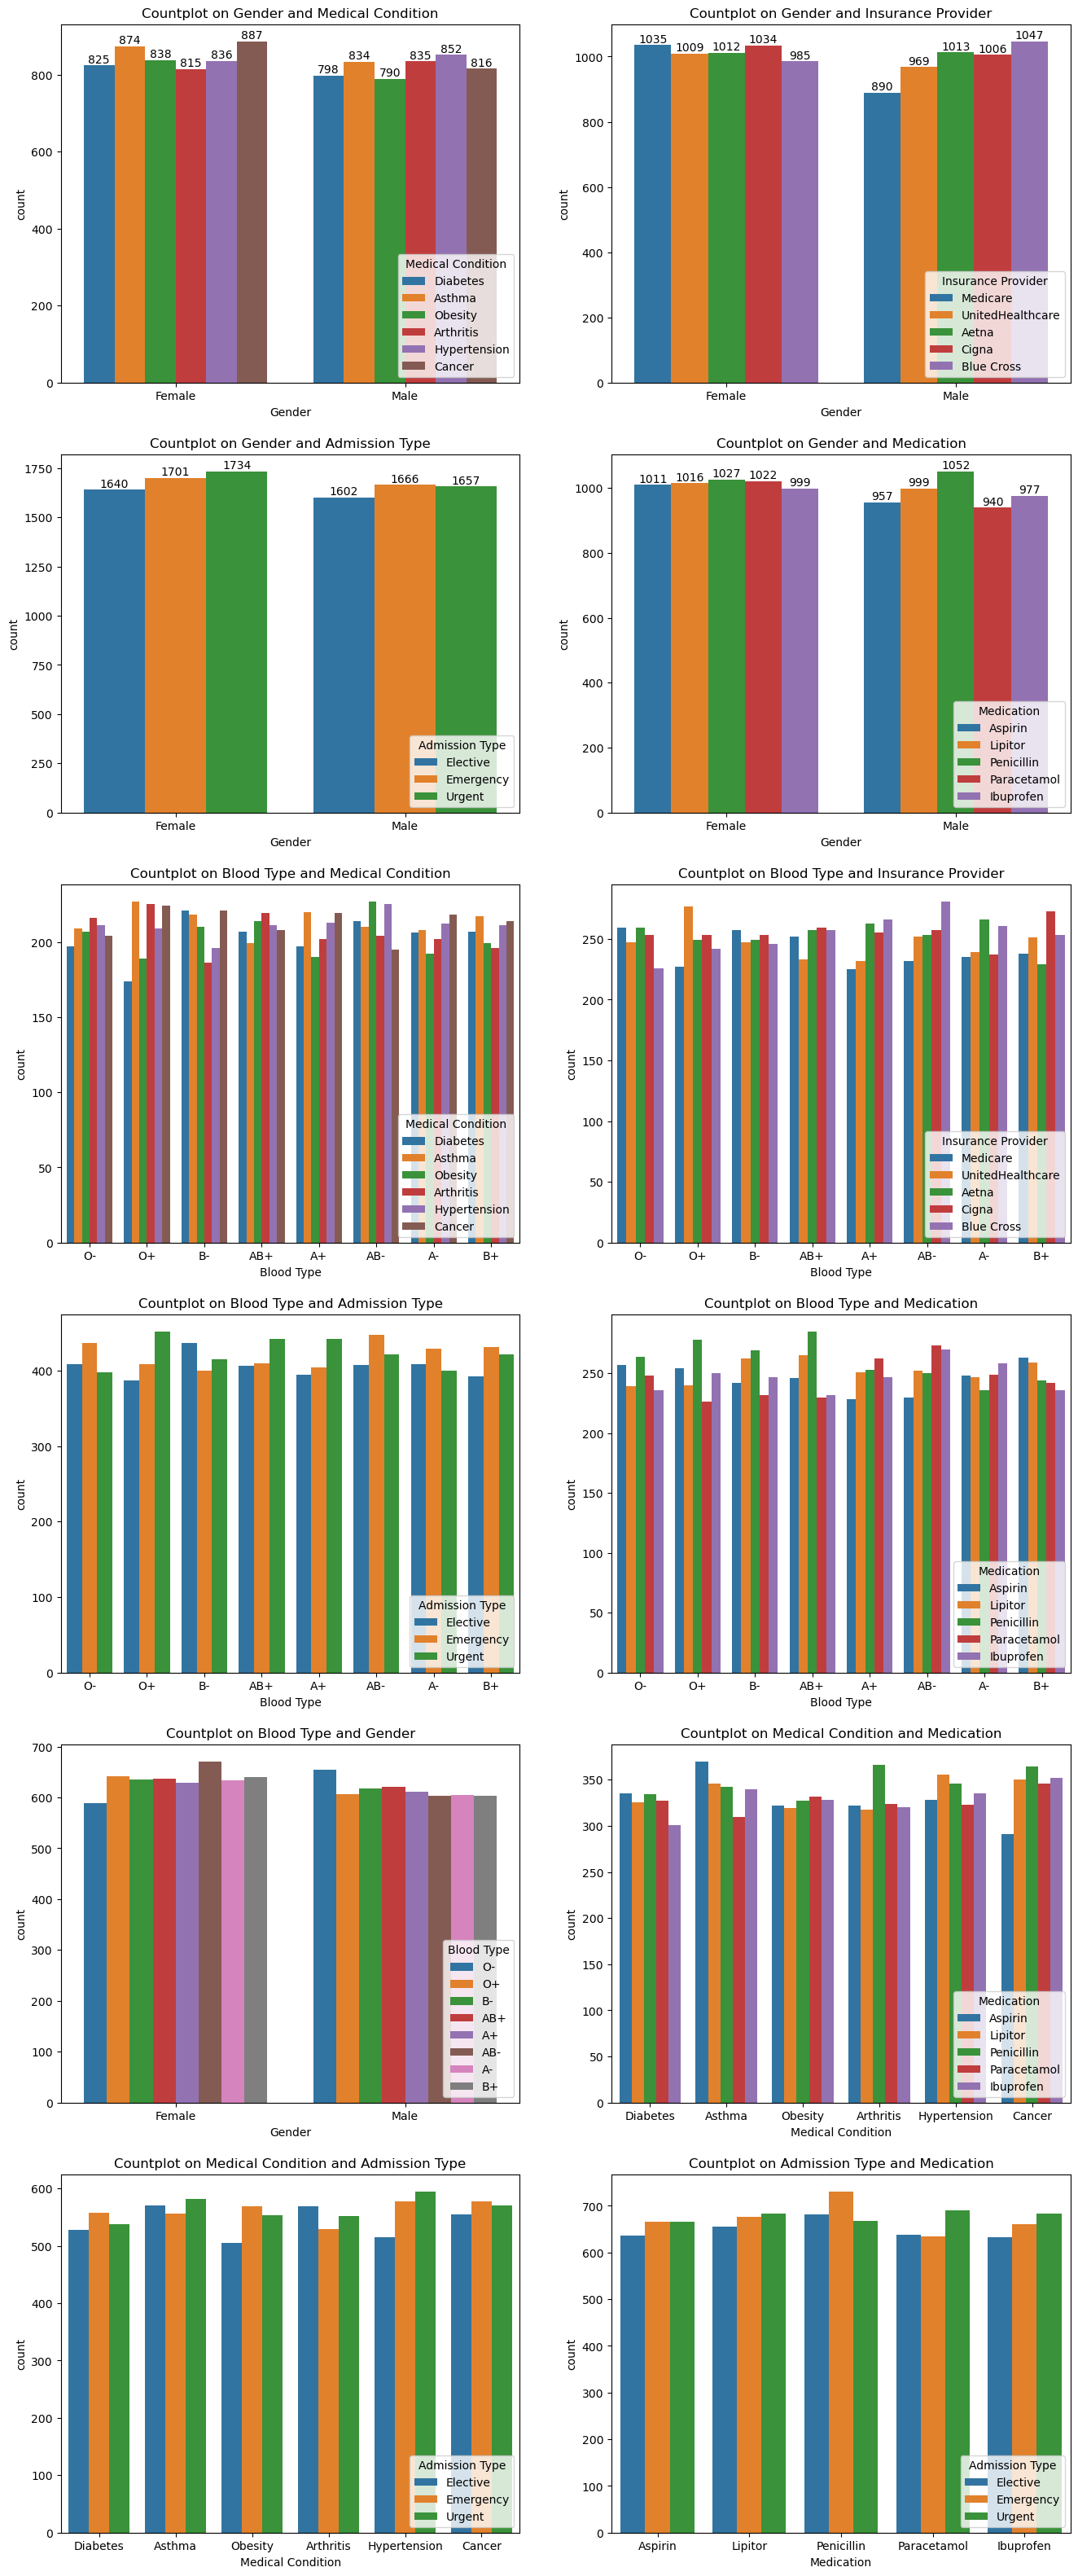

In [38]:
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

plt.figure(figsize = (16, 40))

plt.subplot(6,2,1)
ax = sns.countplot(data = df, x = 'Gender', hue = 'Medical Condition')
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower right")
plt.title("Countplot on Gender and Medical Condition")


plt.subplot(6,2,2)
ax = sns.countplot(data = df, x = "Gender", hue = "Insurance Provider")
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower right")
plt.title("Countplot on Gender and Insurance Provider")


plt.subplot(6,2,3)
ax = sns.countplot(data = df, x = "Gender", hue = "Admission Type")
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower right")
plt.title("Countplot on Gender and Admission Type")

plt.subplot(6,2,4)
ax = sns.countplot(data = df, x = "Gender", hue = "Medication")
for container in ax.containers:
    ax.bar_label(container)
sns.move_legend(ax, "lower right")
plt.title("Countplot on Gender and Medication")


plt.subplot(6,2,5)
ax = sns.countplot(data = df, x = 'Blood Type', hue = 'Medical Condition')
sns.move_legend(ax, "lower right")
plt.title("Countplot on Blood Type and Medical Condition")


plt.subplot(6,2,6)
ax = sns.countplot(data = df, x = "Blood Type", hue = "Insurance Provider")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Blood Type and Insurance Provider")


plt.subplot(6,2,7)
ax = sns.countplot(data = df, x = "Blood Type", hue = "Admission Type")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Blood Type and Admission Type")

plt.subplot(6,2,8)
ax = sns.countplot(data = df, x = "Blood Type", hue = "Medication")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Blood Type and Medication")

plt.subplot(6,2,9)
ax = sns.countplot(data = df, x = "Gender", hue = "Blood Type")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Blood Type and Gender")

plt.subplot(6,2,10)
ax = sns.countplot(data = df, x = "Medical Condition", hue = "Medication")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Medical Condition and Medication")

plt.subplot(6,2,11)
ax = sns.countplot(data = df, x = "Medical Condition", hue = "Admission Type")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Medical Condition and Admission Type")

plt.subplot(6,2,12)
ax = sns.countplot(data = df, x = "Medication", hue = "Admission Type")
sns.move_legend(ax, "lower right")
plt.title("Countplot on Admission Type and Medication")

plt.show()


Bivariate Analysis found no significant difference between variables and Categories

### Correlation analysis

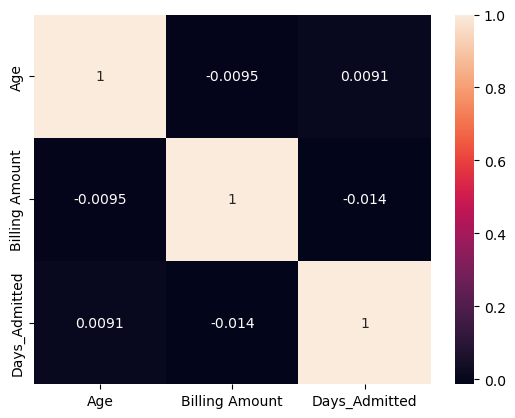

In [39]:
sns.heatmap(data = df.select_dtypes(include = np.number).corr(), annot = True)
plt.show()



Heatmap shows no significant correlation between numerical variables

## Hypothesis Testing

In [40]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'Days_Admitted'],
      dtype='object')

### Hypothesis Testing on Gender & Test Results

In [41]:
gender_testresults = pd.crosstab(df['Gender'], df['Test Results'])
gender_testresults

Test Results,Abnormal,Inconclusive,Normal
Gender,,,
Female,1716,1696,1663
Male,1740,1581,1604


#### Step 1: Setup Null and Alternate Hypothesis

* Null Hypothesis (H0): Gender and Test Results are independent of each other
* Alternate Hypothesis (H1):  Gender and Test Results are NOT independent of each other

#### Step 2: Test Distribution

Here test distribution is Chi-Squared Distribution

#### Step 3: Perform Chi-Squared Test and compute p-value

In [42]:
chi_stat, p_value, dof, expected_value = stats.chi2_contingency(gender_testresults)
print(f"Test statistics for Chi Squared Test is {chi_stat}, p_value is {p_value}, Degree of Freedom is {dof} \nand expected value is \n{expected_value}")


Test statistics for Chi Squared Test is 3.018552748328444, p_value is 0.22106989197879068, Degree of Freedom is 2 
and expected value is 
[[1753.92   1663.0775 1658.0025]
 [1702.08   1613.9225 1608.9975]]


#### Step 4: Comparing P_value with Significance Level

In [43]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Gender and Test Results are NOT independent of each other")
else:
    print("Failed to Reject Null Hypothesis (Ha). Gender and Test Results are independent of each other")

Failed to Reject Null Hypothesis (Ha). Gender and Test Results are independent of each other


In [44]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

### Hypothesis Testing on Blood Type & Test Results

In [45]:
bloodType_testresults = pd.crosstab(df['Blood Type'], df['Test Results'])
bloodType_testresults

Test Results,Abnormal,Inconclusive,Normal
Blood Type,,,
A+,411,403,427
A-,437,391,410
AB+,432,427,399
AB-,449,425,401
B+,422,424,398
B-,456,390,406
O+,417,427,404
O-,432,390,422


#### Step 1: Setup Null and Alternate Hypothesis

* Null Hypothesis (H0): Blood Type and Test Results are independent of each other
* Alternate Hypothesis (H1):  Blood Type and Test Results are NOT independent of each other

#### Step 2: Test Distribution

Here test distribution is Chi-Squared Distribution

#### Step 3: Perform Chi-Squared Test and compute p-value

In [46]:
chi_stat, p_value, dof, expected_value = stats.chi2_contingency(bloodType_testresults)
print(f"Test statistics for Chi Squared Test is {chi_stat}, p_value is {p_value}, Degree of Freedom is {dof} \nand expected value is \n{expected_value}")


Test statistics for Chi Squared Test is 10.419612583949588, p_value is 0.7309067642278131, Degree of Freedom is 14 
and expected value is 
[[428.8896 406.6757 405.4347]
 [427.8528 405.6926 404.4546]
 [434.7648 412.2466 410.9886]
 [440.64   417.8175 416.5425]
 [429.9264 407.6588 406.4148]
 [432.6912 410.2804 409.0284]
 [431.3088 408.9696 407.7216]
 [429.9264 407.6588 406.4148]]


#### Step 4: Comparing P_value with Significance Level

In [47]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Blood Type and Test Results are NOT independent of each other")
else:
    print("Failed to Reject Null Hypothesis (Ha). Blood Type and Test Results are independent of each other")

Failed to Reject Null Hypothesis (Ha). Blood Type and Test Results are independent of each other


In [48]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

### Hypothesis Testing on Medical Condition & Test Results

In [49]:
medicalCondition_testresults = pd.crosstab(df['Medical Condition'], df['Test Results'])
medicalCondition_testresults

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,555,553,542
Asthma,623,551,534
Cancer,577,556,570
Diabetes,537,542,544
Hypertension,602,554,532
Obesity,562,521,545


#### Step 1: Setup Null and Alternate Hypothesis

* Null Hypothesis (H0): Medical Condition and Test Results are independent of each other
* Alternate Hypothesis (H1):  Medical Conditions and Test Results are NOT independent of each other

#### Step 2: Test Distribution

Here test distribution is Chi-Squared Distribution

#### Step 3: Perform Chi-Squared Test and compute p-value

In [50]:
chi_stat, p_value, dof, expected_value = stats.chi2_contingency(medicalCondition_testresults)
print(f"Test statistics for Chi Squared Test is {chi_stat}, p_value is {p_value}, Degree of Freedom is {dof} \nand expected value is \n{expected_value}")


Test statistics for Chi Squared Test is 7.723822392194834, p_value is 0.6557931084771458, Degree of Freedom is 10 
and expected value is 
[[570.24   540.705  539.055 ]
 [590.2848 559.7116 558.0036]
 [588.5568 558.0731 556.3701]
 [560.9088 531.8571 530.2341]
 [583.3728 553.1576 551.4696]
 [562.6368 533.4956 531.8676]]


#### Step 4: Comparing P_value with Significance Level

In [51]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Medical Condition and Test Results are NOT independent of each other")
else:
    print("Failed to Reject Null Hypothesis (Ha). Medical Condition and Test Results are independent of each other")

Failed to Reject Null Hypothesis (Ha). Medical Condition and Test Results are independent of each other


In [52]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

### Hypothesis Testing on Admission Type & Test Results

In [53]:
admissionType_testresults = pd.crosstab(df['Admission Type'], df['Test Results'])
admissionType_testresults

Test Results,Abnormal,Inconclusive,Normal
Admission Type,,,
Elective,1108,1047,1087
Emergency,1157,1124,1086
Urgent,1191,1106,1094


#### Step 1: Setup Null and Alternate Hypothesis

* Null Hypothesis (H0): Admission Type and Test Results are independent of each other
* Alternate Hypothesis (H1):  Admission Type and Test Results are NOT independent of each other

#### Step 2: Test Distribution

Here test distribution is Chi-Squared Distribution

#### Step 3: Perform Chi-Squared Test and compute p-value

In [54]:
chi_stat, p_value, dof, expected_value = stats.chi2_contingency(admissionType_testresults)
print(f"Test statistics for Chi Squared Test is {chi_stat}, p_value is {p_value}, Degree of Freedom is {dof} \nand expected value is \n{expected_value}")


Test statistics for Chi Squared Test is 2.202748398938801, p_value is 0.6985261329322806, Degree of Freedom is 4 
and expected value is 
[[1120.4352 1062.4034 1059.1614]
 [1163.6352 1103.3659 1099.9989]
 [1171.9296 1111.2307 1107.8397]]


#### Step 4: Comparing P_value with Significance Level

In [55]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Admission Type and Test Results are NOT independent of each other")
else:
    print("Failed to Reject Null Hypothesis (Ha). Admission Type and Test Results are independent of each other")

Failed to Reject Null Hypothesis (Ha). Admission Type and Test Results are independent of each other


In [56]:
cat_cols, num_cols

(Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
        'Admission Type', 'Medication', 'Test Results'],
       dtype='object'),
 Index(['Age', 'Billing Amount', 'Days_Admitted'], dtype='object'))

### Hypothesis Testing on Medication & Test Results

In [57]:
medication_testresults = pd.crosstab(df['Medication'], df['Test Results'])
medication_testresults

Test Results,Abnormal,Inconclusive,Normal
Medication,,,
Aspirin,654,634,680
Ibuprofen,680,627,669
Lipitor,721,685,609
Paracetamol,685,651,626
Penicillin,716,680,683


#### Step 1: Setup Null and Alternate Hypothesis

* Null Hypothesis (H0): Medication and Test Results are independent of each other
* Alternate Hypothesis (H1):  Medication and Test Results are NOT independent of each other

#### Step 2: Test Distribution

Here test distribution is Chi-Squared Distribution

#### Step 3: Perform Chi-Squared Test and compute p-value

In [58]:
chi_stat, p_value, dof, expected_value = stats.chi2_contingency(medication_testresults)
print(f"Test statistics for Chi Squared Test is {chi_stat}, p_value is {p_value}, Degree of Freedom is {dof} \nand expected value is \n{expected_value}")


Test statistics for Chi Squared Test is 10.879107879942353, p_value is 0.20864365896590745, Degree of Freedom is 8 
and expected value is 
[[680.1408 644.9136 642.9456]
 [682.9056 647.5352 645.5592]
 [696.384  660.3155 658.3005]
 [678.0672 642.9474 640.9854]
 [718.5024 681.2883 679.2093]]


#### Step 4: Comparing P_value with Significance Level

In [59]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis(H0). Medication and Test Results are NOT independent of each other")
else:
    print("Failed to Reject Null Hypothesis (Ha). Medication and Test Results are independent of each other")

Failed to Reject Null Hypothesis (Ha). Medication and Test Results are independent of each other


**Conclusion**:

Based on the results from Hypothesis Testing,

* Gender and Test Results are independent of each other
* Blood Type and Test Results are independent of each other
* Medical Condition and Test Results are independent of each other
* Admission Type and Test Results are independent of each other
* Medication and Test Results are independent of each other

